In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from fbprophet import Prophet
def prophet_forecast(data, period):
    
    m = Prophet()
    m_fit = m.fit(data)
    future = m.make_future_dataframe(periods = period)
    forecast = m.predict(future)
    forecast = forecast.round(0)
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)
    return fig1, fig2, forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


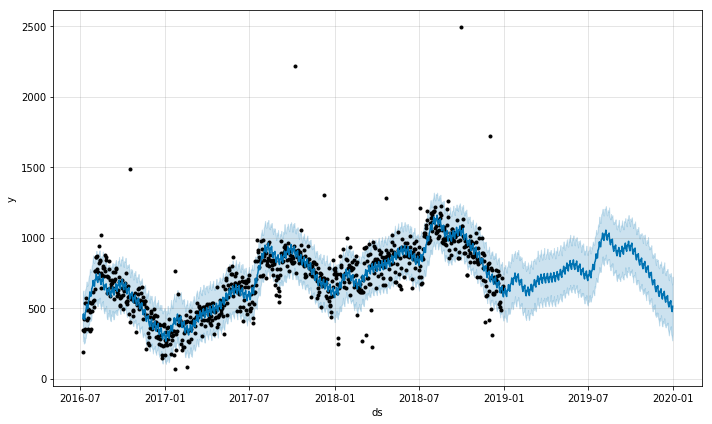

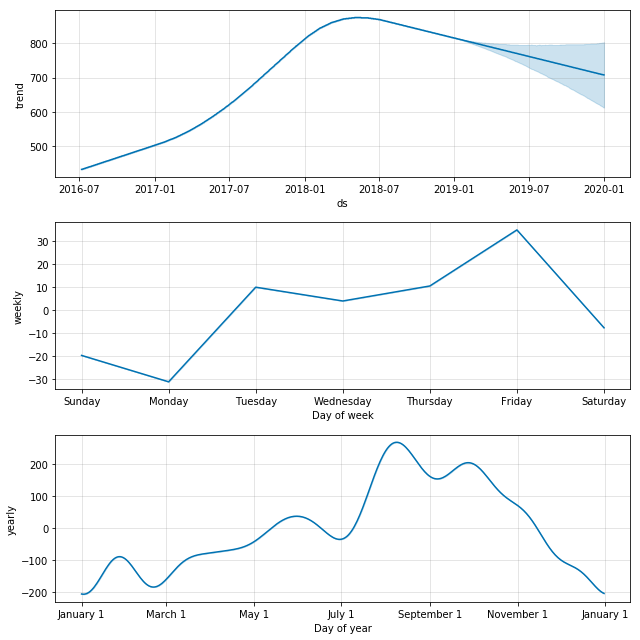

In [10]:
m = Prophet()
m_fit = m.fit(date_ts)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast = forecast.round(0)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [11]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='700 days', period='100 days', horizon = '200 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-06-14 00:00:00 and 2018-06-14 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-15,927.405167,777.121330,1087.415948,890,2018-06-14
1,2018-06-16,891.905885,735.987389,1047.736342,709,2018-06-14
2,2018-06-17,862.090856,712.211830,1013.090584,643,2018-06-14
3,2018-06-18,855.210407,697.219704,1004.126168,845,2018-06-14
4,2018-06-19,897.651678,741.521762,1050.717169,882,2018-06-14


In [13]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
print(np.mean(df_p.rmse))
print(np.mean(df_p.mae))
print(np.mean(df_p.mape))

193.53093250430595
156.94375867082525
0.19491003848787858


(array([ 59.,  27.,  51., 135.,  15.,  11.,  35.,  49.,  56.,  49.]),
 array([ 94.34615441, 119.13177613, 143.91739785, 168.70301957,
        193.4886413 , 218.27426302, 243.05988474, 267.84550646,
        292.63112818, 317.4167499 , 342.20237162]),
 <a list of 10 Patch objects>)

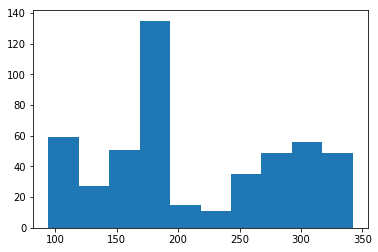

In [104]:
plt.hist(df_p.rmse)

#### Dataset with all the entries 
Data_time_stamp.csv

#### Data by Date
Data_by_date.csv

In [3]:
## Preparing Data for the Prophet code
date_ts = pd.read_csv("Data_by_date.csv")
date_ts.columns = [ "ds", "y"]

In [4]:
Train = date_ts[:-92]
Test = date_ts[-92:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/shirishpandagare/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


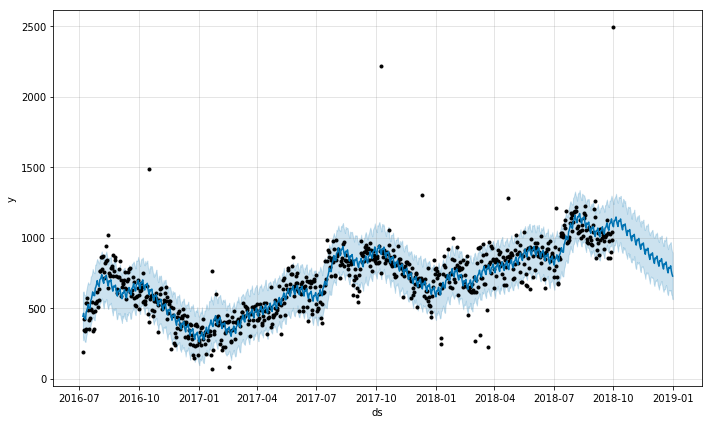

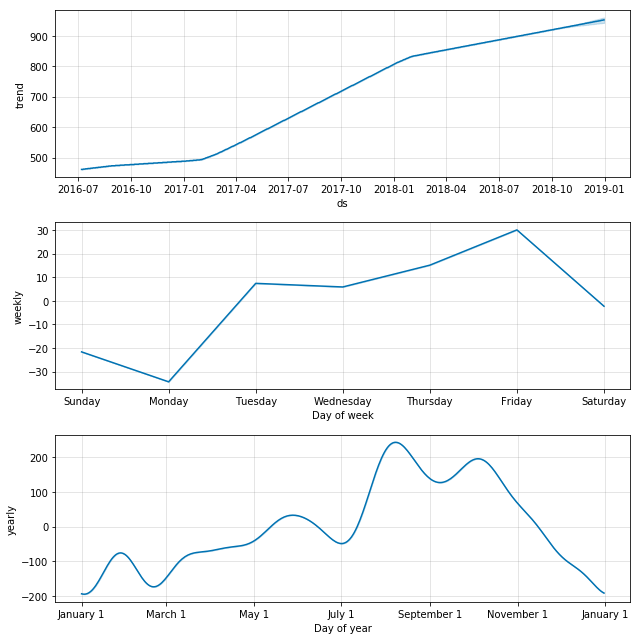

In [5]:
fig1, fig2, forcst = prophet_forecast(Train, 92)


In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

In [1]:
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()

# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(forcst)
# df_p.head()

In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

In [45]:
pred = forcst[-92:][["ds","yhat"]]

In [47]:
RSS = sum((pred.yhat - Test.y)**2)
print("The Residual Sum of Square is := " + str(RSS) + ".")

The Residual Sum of Square is := 3828164.0.


In [42]:
fig1.savefig("train_model.png")

In [41]:
fig2.savefig("train_model_year_week.png")

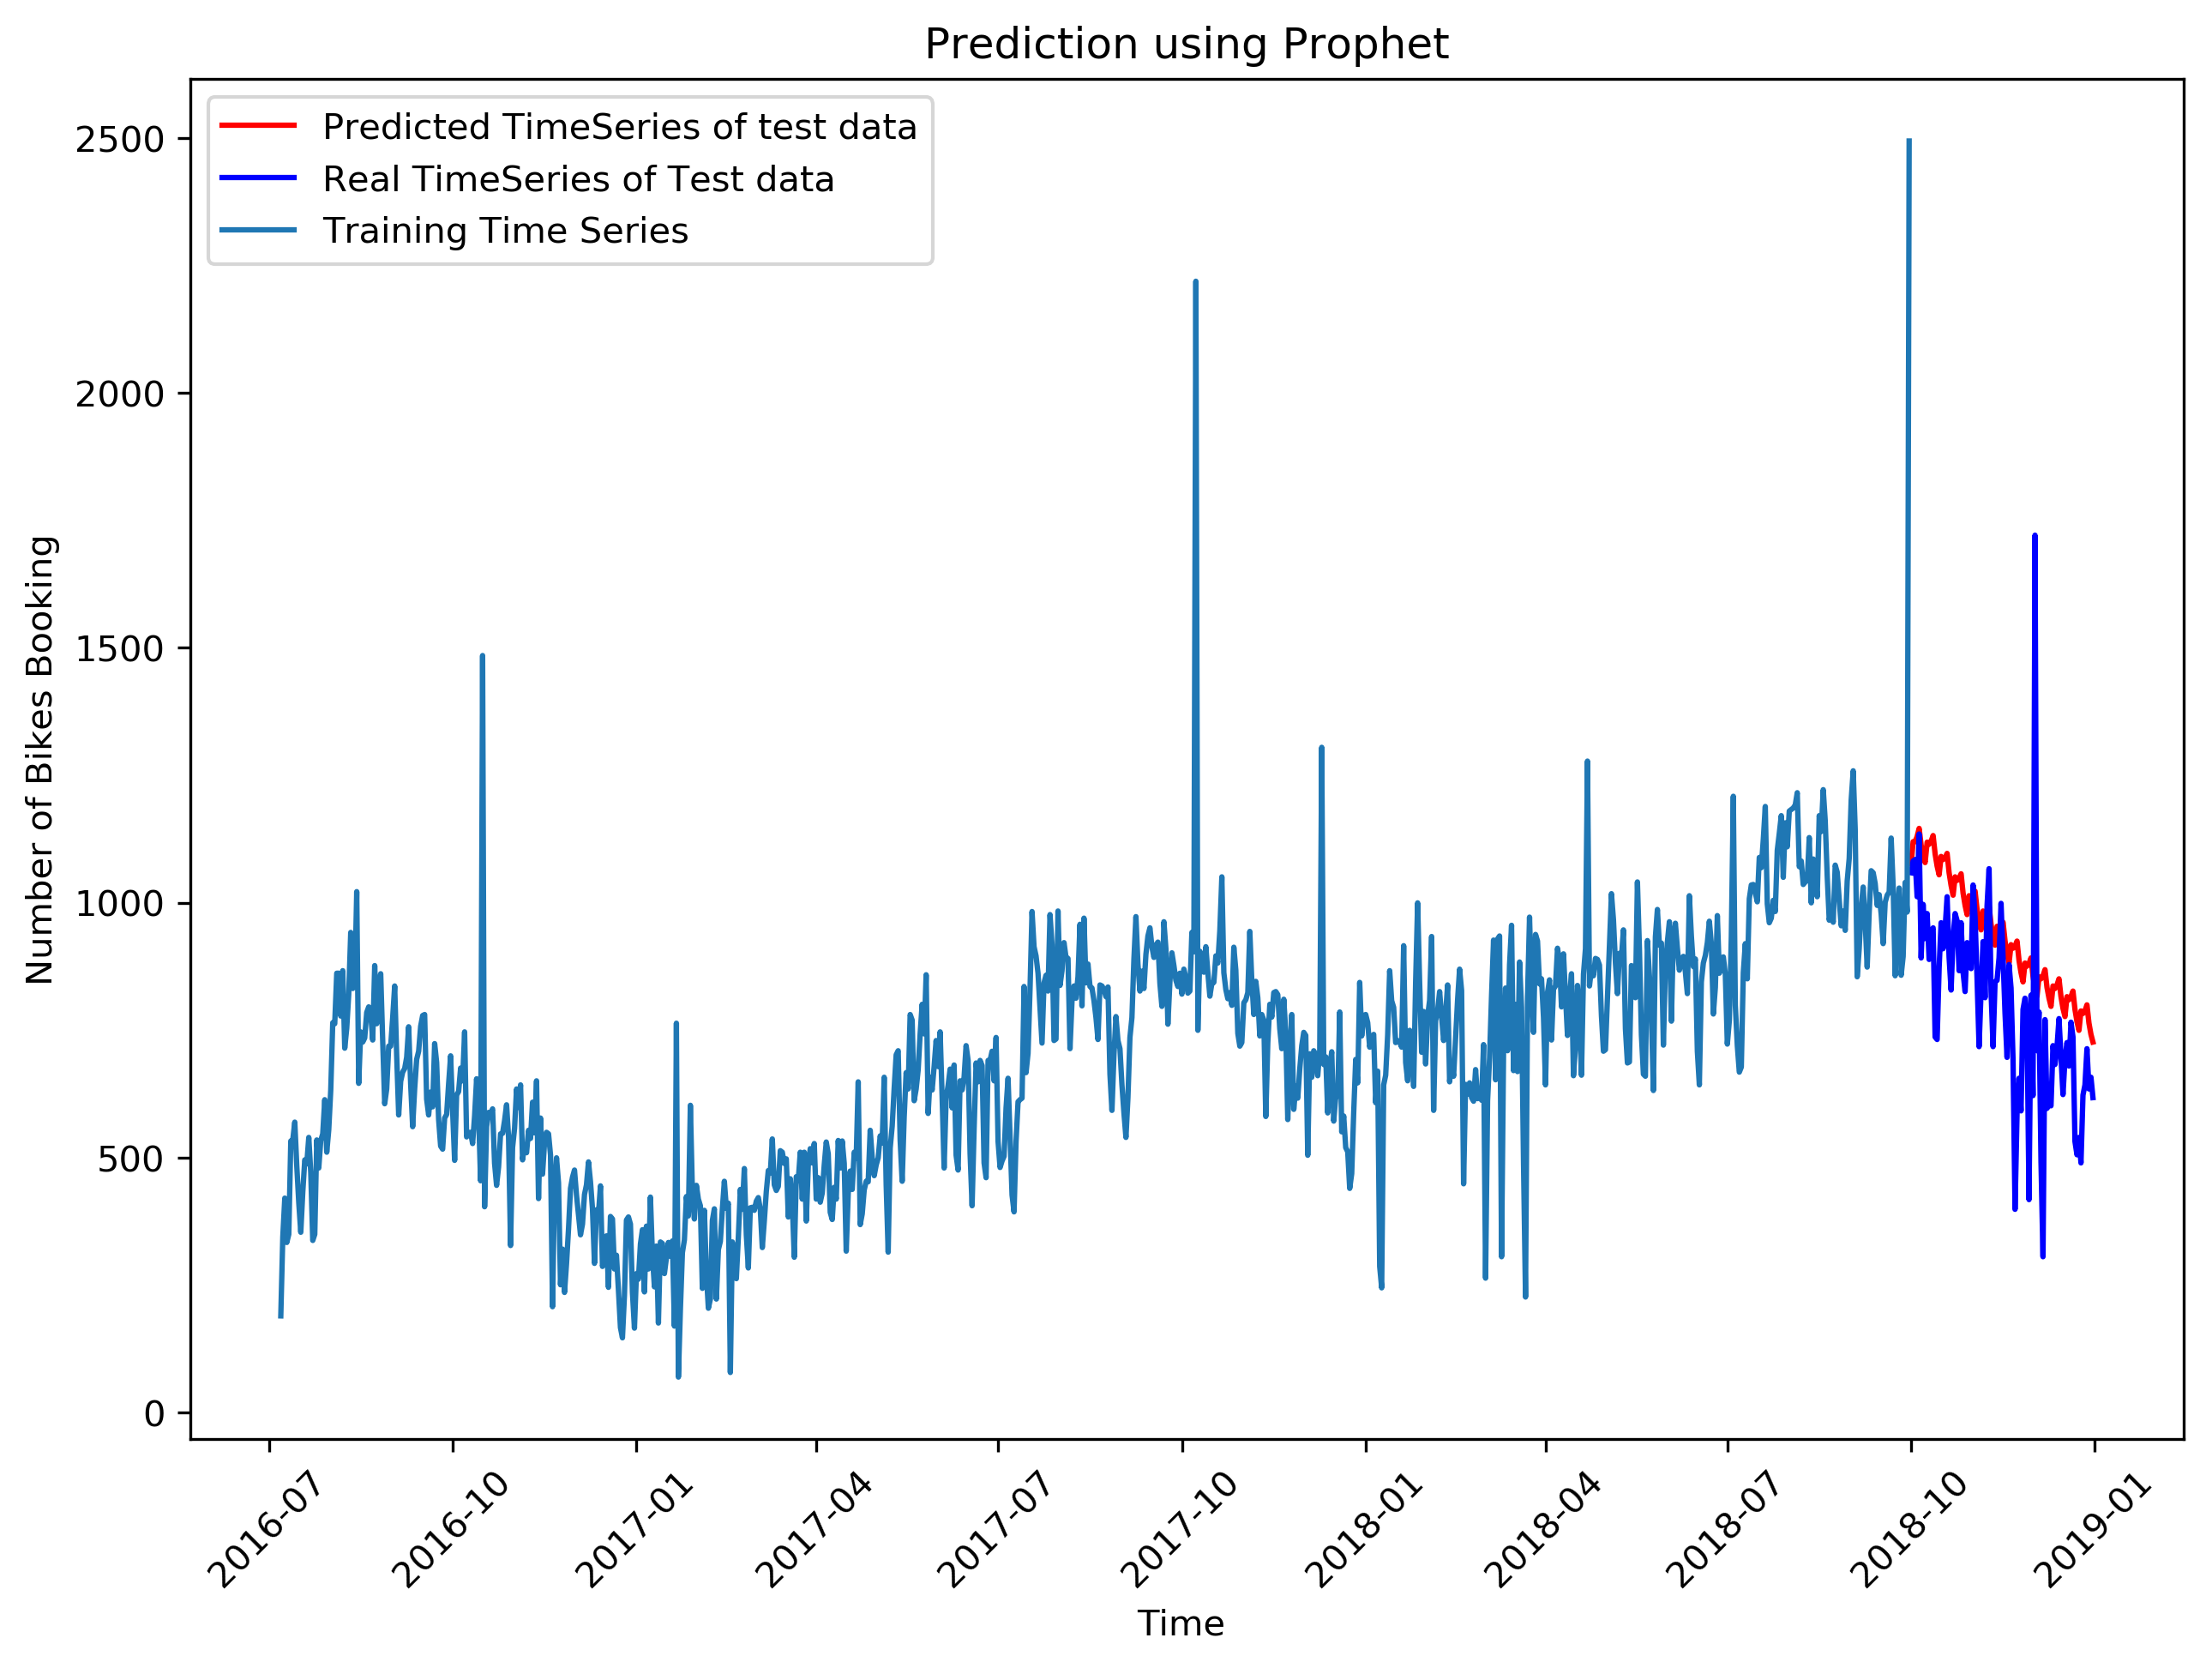

In [87]:
figure(num=None, figsize=(10, 7), dpi=300, facecolor='w', edgecolor='k')

time_pred = pd.to_datetime(date_ts.ds[pred.yhat.index])
time_train = pd.to_datetime(date_ts.ds[:-92])
plt.plot(time_pred, pred.yhat, c= "r", label = "Predicted TimeSeries of test data")
plt.plot(time_pred, date_ts.y[-92:], c = "b", label = "Real TimeSeries of Test data")
plt.plot(time_train, date_ts.y[:-92], label = "Training Time Series")
plt.tick_params(axis='x', rotation=45)
plt.xticks()
plt.legend()
plt.xlabel("Time ")
plt.ylabel("Number of Bikes Booking")
plt.title("Prediction using Prophet")
plt.savefig("prdicted_prophet_graph.png")

In [16]:
np.sqrt(16765693/899)

136.56232711837717

In [17]:
np.sqrt(14448893.1/534)

164.4927118360902